In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install langchain-ollama langchain-community==0.3.25 langchain-core>=0.3.65


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Chat Model

In [ ]:
from langchain_ollama import ChatOllama

chatModel = ChatOllama(
    model="llama3.2",      # any installed ollama model
    temperature=0.2
)

# Memory

The Memory component of LangChain is responsible for storing and retrieving data in the process of a conversation. There are two main types of memory: short-term and long-term. Short-term memory generally refers to how to pass data in the context of a singular conversation, while long-term memory deals with how to fetch and update information between conversations.

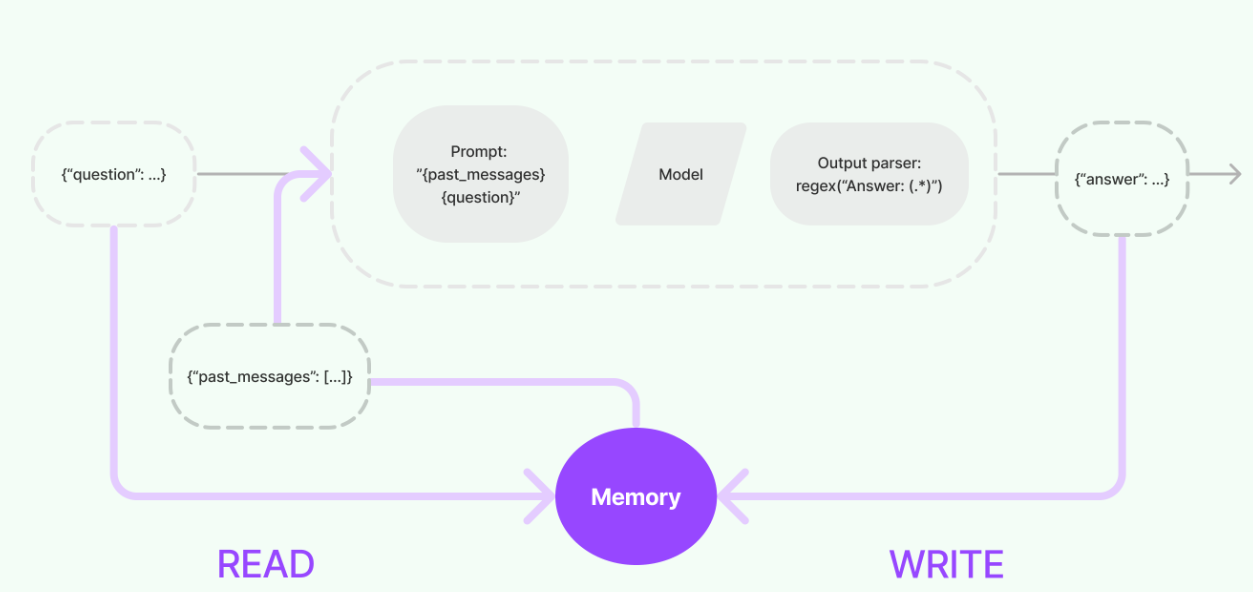

# ConversationBufferMemory

Conversation Buffer Memory
ConversationBufferMemory keeps a list of chat messages in a buffer and passes those into the prompt template.

**Concept:**

It stores the entire conversation history in a buffer.

When a user interacts with the AI, the model refers to the full conversation context.

**Use Cases:**

Simple chatbot applications where retaining all previous interactions is needed.

Customer service bots tracking a full conversation with a user.

Assistants for research where all details need to be remembered.

**Limitations:**

As conversation history grows, memory can become too large, increasing processing costs.

Not efficient for long interactions.

In [ ]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory


prompt = ChatPromptTemplate(
    messages=[
        SystemMessagePromptTemplate.from_template(
            "You are a nice chatbot having a conversation with a human."
        ),
        # The `variable_name` here is what must align with memory
        MessagesPlaceholder(variable_name="chat_history"),
        HumanMessagePromptTemplate.from_template("{question}")
    ]
)

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

# Clear the chat history
memory.clear()


conversation = LLMChain(
    llm=chatModel,
    prompt=prompt,
    verbose=True,
    memory=memory
)

In [ ]:
response = conversation({"question": "hi"})



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a nice chatbot having a conversation with a human.
Human: hi

> Finished chain.


In [ ]:
response

{'question': 'hi',
 'chat_history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={})],
 'text': "Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!"}

In [ ]:
print(response)

{'question': 'hi', 'chat_history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={})], 'text': "Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!"}


In [ ]:
print(response['question'])

hi


In [ ]:
print(response['chat_history'])

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={})]


In [ ]:
print(response['text'])

Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!


In [ ]:
response1 = conversation({"question": "My name is subbu and I have moved 33 times."})



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a nice chatbot having a conversation with a human.
Human: hi
AI: Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!
Human: My name is subbu and I have moved 33 times.

> Finished chain.


In [ ]:
response1

{'question': 'My name is subbu and I have moved 33 times.',
 'chat_history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={})],
 'text': "Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you thin

In [ ]:
print(response1)

{'question': 'My name is subbu and I have moved 33 times.', 'chat_history': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={})], 'text': "Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's a

In [ ]:
print(response1['question'])

My name is subbu and I have moved 33 times.


In [ ]:
print(response1['text'])

Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?

I'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?


In [ ]:
print(len(response1['chat_history']))

4


In [ ]:
print(response1['chat_history'])

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={})]


In [ ]:
response2 = conversation({"question": "If my average moving distance was 100 miles, how many miles took all my moves?"})



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a nice chatbot having a conversation with a human.
Human: hi
AI: Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!
Human: My name is subbu and I have moved 33 times.
AI: Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?

I'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?
Human: If my average moving distance was 100 miles, how many miles took all my moves?

> Finished chain.


In [ ]:
print(len(response2['chat_history']))

6


In [ ]:
print(response2['chat_history'])

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={}), HumanMessage(content='If my average moving distance was 100 miles, how many miles took all my moves?', additional_kwargs={}, response_metadata={}), AIMessage(content="That's a fun math problem!\n\nLet's do the calcul

In [ ]:
response3 = conversation({"question": "Do you remember my name?"})



> Entering new LLMChain chain...
Prompt after formatting:
System: You are a nice chatbot having a conversation with a human.
Human: hi
AI: Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!
Human: My name is subbu and I have moved 33 times.
AI: Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?

I'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?
Human: If my average moving distance was 100 miles, how many miles took all my moves?
AI: That's a fun math problem!

Let's do the calculation: if you've moved 33 times and each move is an average of 100 miles, we can multiply the number of moves by the average distance.

33 moves × 100 miles/move = 3,300 miles

So, Subbu, it looks like a

In [ ]:
print(len(response3['chat_history']))

8


In [ ]:
print(response3['chat_history'])

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={}), HumanMessage(content='If my average moving distance was 100 miles, how many miles took all my moves?', additional_kwargs={}, response_metadata={}), AIMessage(content="That's a fun math problem!\n\nLet's do the calcul

In [ ]:
print(response3['chat_history'][-1].content)

I remember that your name is Subbu. We just started our conversation, but I'm glad I could recall it correctly! How's your day going so far, Subbu?


In [ ]:
print(memory.buffer)

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={}), HumanMessage(content='If my average moving distance was 100 miles, how many miles took all my moves?', additional_kwargs={}, response_metadata={}), AIMessage(content="That's a fun math problem!\n\nLet's do the calcul

In [ ]:
print(memory.buffer_as_messages)

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is subbu and I have moved 33 times.', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?", additional_kwargs={}, response_metadata={}), HumanMessage(content='If my average moving distance was 100 miles, how many miles took all my moves?', additional_kwargs={}, response_metadata={}), AIMessage(content="That's a fun math problem!\n\nLet's do the calcul

In [ ]:
print(memory.buffer_as_str)

Human: hi
AI: Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!
Human: My name is subbu and I have moved 33 times.
AI: Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?

I'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?
Human: If my average moving distance was 100 miles, how many miles took all my moves?
AI: That's a fun math problem!

Let's do the calculation: if you've moved 33 times and each move is an average of 100 miles, we can multiply the number of moves by the average distance.

33 moves × 100 miles/move = 3,300 miles

So, Subbu, it looks like all your moves have added up to a total distance of approximately 3,300 miles! That's a long way!

Do you think this experience 

In [ ]:
# Access the list of message objects
history_messages = memory.chat_memory.messages

# You can iterate through them:
for message in history_messages:
    print(f"{type(message).__name__}: {message.content}")

HumanMessage: hi
AIMessage: Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about, or are you just looking for some casual conversation? I'm all ears (or rather, all text)!
HumanMessage: My name is subbu and I have moved 33 times.
AIMessage: Nice to meet you, Subbu! Wow, 33 moves is quite a lot! That's impressive, but also maybe a bit exhausting? How do you think it's affected your life and relationships?

I'm curious, what made you decide to move so many times? Was it for work, education, or something else entirely?
HumanMessage: If my average moving distance was 100 miles, how many miles took all my moves?
AIMessage: That's a fun math problem!

Let's do the calculation: if you've moved 33 times and each move is an average of 100 miles, we can multiply the number of moves by the average distance.

33 moves × 100 miles/move = 3,300 miles

So, Subbu, it looks like all your moves have added up to a total distance of approximately 3,300 miles! That's 

In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser

messages = [str(message) for message in memory.buffer]

# Initialize the parser
parser = CommaSeparatedListOutputParser()

# Convert messages to a comma-separated string
formatted_messages = parser.parse(", ".join(messages))

In [ ]:
# Display all messages
print(formatted_messages)

["content='hi' additional_kwargs={} response_metadata={}", 'content="Hello! It\'s nice to meet you. Is there something on your mind that you\'d like to talk about', "or are you just looking for some casual conversation? I'm all ears (or rather", 'all text)!" additional_kwargs={} response_metadata={}', "content='My name is subbu and I have moved 33 times.' additional_kwargs={} response_metadata={}", 'content="Nice to meet you', 'Subbu! Wow', "33 moves is quite a lot! That's impressive", "but also maybe a bit exhausting? How do you think it's affected your life and relationships?\\n\\nI'm curious", 'what made you decide to move so many times? Was it for work', 'education', 'or something else entirely?" additional_kwargs={} response_metadata={}', "content='If my average moving distance was 100 miles", "how many miles took all my moves?' additional_kwargs={} response_metadata={}", 'content="That\'s a fun math problem!\\n\\nLet\'s do the calculation: if you\'ve moved 33 times and each move 

In [ ]:
print("Parsed List:", formatted_messages)

Parsed List: ["content='hi' additional_kwargs={} response_metadata={}", 'content="Hello! It\'s nice to meet you. Is there something on your mind that you\'d like to talk about', "or are you just looking for some casual conversation? I'm all ears (or rather", 'all text)!" additional_kwargs={} response_metadata={}', "content='My name is subbu and I have moved 33 times.' additional_kwargs={} response_metadata={}", 'content="Nice to meet you', 'Subbu! Wow', "33 moves is quite a lot! That's impressive", "but also maybe a bit exhausting? How do you think it's affected your life and relationships?\\n\\nI'm curious", 'what made you decide to move so many times? Was it for work', 'education', 'or something else entirely?" additional_kwargs={} response_metadata={}', "content='If my average moving distance was 100 miles", "how many miles took all my moves?' additional_kwargs={} response_metadata={}", 'content="That\'s a fun math problem!\\n\\nLet\'s do the calculation: if you\'ve moved 33 times a

In [ ]:
# Display all messages
for message in formatted_messages:
    print(message)

content='hi' additional_kwargs={} response_metadata={}
content="Hello! It's nice to meet you. Is there something on your mind that you'd like to talk about
or are you just looking for some casual conversation? I'm all ears (or rather
all text)!" additional_kwargs={} response_metadata={}
content='My name is subbu and I have moved 33 times.' additional_kwargs={} response_metadata={}
content="Nice to meet you
Subbu! Wow
33 moves is quite a lot! That's impressive
but also maybe a bit exhausting? How do you think it's affected your life and relationships?\n\nI'm curious
what made you decide to move so many times? Was it for work
education
or something else entirely?" additional_kwargs={} response_metadata={}
content='If my average moving distance was 100 miles
how many miles took all my moves?' additional_kwargs={} response_metadata={}
content="That's a fun math problem!\n\nLet's do the calculation: if you've moved 33 times and each move is an average of 100 miles
we can multiply the number

# Conversation Buffer Window Memory

**Concept:**

Stores only the last ‘N’ interactions, discarding older ones.

Works like a sliding window—old messages are removed as new ones are added.

**Use Cases:**

Chatbots with limited memory constraints.

Transactional bots (e.g., ordering food, booking tickets).

Gaming bots (to track recent moves).

**Limitations:**

May lose important context if the relevant part of the conversation was too far back.

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
from langchain.chains import ConversationChain

In [ ]:
window_memory = ConversationBufferWindowMemory(k=2)

In [ ]:
conversation_window = ConversationChain(
    llm=chatModel,
    memory = window_memory,
    verbose=True
)

In [ ]:
response1 = conversation_window({"input": "Hi, my name is subbu"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is subbu
AI:

> Finished chain.


In [ ]:
response2 = conversation_window({"input": "My favorite color is blue"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is subbu
AI: Nice to meet you, Subbu! I'm an advanced language model, and I'll do my best to assist you with any questions or topics you'd like to discuss. I've been trained on a vast amount of text data from the internet, books, and other sources, so feel free to ask me anything that's on your mind. By the way, did you know that the name Subbu is commonly used in India and Sri Lanka? It's derived from the Tamil word "Subbu," which means "good" or "kind."
Human: My favorite color is blue
AI:

> Finished chain.


In [ ]:
response3 = conversation_window({"input": "My favorite animals are dogs"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is subbu
AI: Nice to meet you, Subbu! I'm an advanced language model, and I'll do my best to assist you with any questions or topics you'd like to discuss. I've been trained on a vast amount of text data from the internet, books, and other sources, so feel free to ask me anything that's on your mind. By the way, did you know that the name Subbu is commonly used in India and Sri Lanka? It's derived from the Tamil word "Subbu," which means "good" or "kind."
Human: My favorite color is blue
AI: Blue is a wonderful choice! Did you know that blue is often associated with feelings of calmness, serenity, and trustworthiness? In many cultures, blue is also l

In [ ]:
response4 = conversation_window({"input": "I like to drive a vespa scooter in the city"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: My favorite color is blue
AI: Blue is a wonderful choice! Did you know that blue is often associated with feelings of calmness, serenity, and trustworthiness? In many cultures, blue is also linked to creativity and inspiration. For example, in art history, the Impressionist movement was characterized by its use of vibrant blues to capture the effects of light on water. Additionally, blue is also a popular color for corporate branding, as it's often seen as a symbol of professionalism and stability.

By the way, did you know that there are many different shades of blue, each with its own unique characteristics? For instance, sky blue is a pale, serene shade that 

In [ ]:
response5 = conversation_window({"input": "My favorite city is San Francisco"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: My favorite animals are dogs
AI: Dogs are wonderful companions! Did you know that dogs have been human companions for thousands of years, with evidence of dog domestication dating back to around 15,000 years ago in Asia? Since then, dogs have evolved into over 340 recognized breeds, ranging from the tiny Chihuahua to the massive Great Dane.

Interestingly, dogs are highly social animals and are able to read human body language and facial expressions to communicate with us. They're also incredibly intelligent and can be trained to perform a wide range of tasks, from simple obedience commands to complex tasks like search and rescue operations.

By the way, did you

In [ ]:
response6 = conversation_window({"input": "What is my favorite color?"})



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: I like to drive a vespa scooter in the city
AI: Vespa scooters are a great way to navigate through cities! Did you know that Vespa, an Italian company, was founded in 1946 by Enrico Piaggio and has since become synonymous with stylish and practical scooters? The original Vespa model, known as the "Type 1," was designed to be lightweight, fuel-efficient, and easy to handle, making it perfect for urban commuting.

Interestingly, Vespa scooters are often associated with Italian culture and have been featured in numerous films, TV shows, and music videos. In fact, the iconic Vespa scooter has become a symbol of freedom and adventure, evoking images of carefree summe

In [ ]:
print(window_memory)

chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi, my name is subbu', additional_kwargs={}, response_metadata={}), AIMessage(content='Nice to meet you, Subbu! I\'m an advanced language model, and I\'ll do my best to assist you with any questions or topics you\'d like to discuss. I\'ve been trained on a vast amount of text data from the internet, books, and other sources, so feel free to ask me anything that\'s on your mind. By the way, did you know that the name Subbu is commonly used in India and Sri Lanka? It\'s derived from the Tamil word "Subbu," which means "good" or "kind."', additional_kwargs={}, response_metadata={}), HumanMessage(content='My favorite color is blue', additional_kwargs={}, response_metadata={}), AIMessage(content="Blue is a wonderful choice! Did you know that blue is often associated with feelings of calmness, serenity, and trustworthiness? In many cultures, blue is also linked to creativity and inspiration. For example, in art history, t

In [ ]:
print(window_memory.chat_memory)

Human: Hi, my name is subbu
AI: Nice to meet you, Subbu! I'm an advanced language model, and I'll do my best to assist you with any questions or topics you'd like to discuss. I've been trained on a vast amount of text data from the internet, books, and other sources, so feel free to ask me anything that's on your mind. By the way, did you know that the name Subbu is commonly used in India and Sri Lanka? It's derived from the Tamil word "Subbu," which means "good" or "kind."
Human: My favorite color is blue
AI: Blue is a wonderful choice! Did you know that blue is often associated with feelings of calmness, serenity, and trustworthiness? In many cultures, blue is also linked to creativity and inspiration. For example, in art history, the Impressionist movement was characterized by its use of vibrant blues to capture the effects of light on water. Additionally, blue is also a popular color for corporate branding, as it's often seen as a symbol of professionalism and stability.

By the wa

In [ ]:
print(window_memory.buffer)

Human: My favorite city is San Francisco
AI: San Francisco! What a fantastic choice! Did you know that San Francisco has been a hub for innovation and culture since its founding in 1776? The city's strategic location at the mouth of the Golden Gate Strait made it an ideal spot for trade and commerce, attracting settlers from all over the world.

Interestingly, San Francisco is home to some of the most iconic landmarks in the United States, including the Golden Gate Bridge, Alcatraz Island, and Fisherman's Wharf. The city's unique geography, with its steep hills and foggy climate, has also inspired countless artists, writers, and musicians over the years.

By the way, did you know that San Francisco is home to a thriving tech industry, with companies like Google, Facebook, and Apple having headquarters or major offices in the city? The city's proximity to Silicon Valley and its own startup scene make it an attractive destination for entrepreneurs and innovators alike.

Would you like to

In [ ]:
print(window_memory.buffer_as_messages)

[HumanMessage(content='My favorite city is San Francisco', additional_kwargs={}, response_metadata={}), AIMessage(content="San Francisco! What a fantastic choice! Did you know that San Francisco has been a hub for innovation and culture since its founding in 1776? The city's strategic location at the mouth of the Golden Gate Strait made it an ideal spot for trade and commerce, attracting settlers from all over the world.\n\nInterestingly, San Francisco is home to some of the most iconic landmarks in the United States, including the Golden Gate Bridge, Alcatraz Island, and Fisherman's Wharf. The city's unique geography, with its steep hills and foggy climate, has also inspired countless artists, writers, and musicians over the years.\n\nBy the way, did you know that San Francisco is home to a thriving tech industry, with companies like Google, Facebook, and Apple having headquarters or major offices in the city? The city's proximity to Silicon Valley and its own startup scene make it an

In [ ]:
print(window_memory.buffer_as_str)

Human: My favorite city is San Francisco
AI: San Francisco! What a fantastic choice! Did you know that San Francisco has been a hub for innovation and culture since its founding in 1776? The city's strategic location at the mouth of the Golden Gate Strait made it an ideal spot for trade and commerce, attracting settlers from all over the world.

Interestingly, San Francisco is home to some of the most iconic landmarks in the United States, including the Golden Gate Bridge, Alcatraz Island, and Fisherman's Wharf. The city's unique geography, with its steep hills and foggy climate, has also inspired countless artists, writers, and musicians over the years.

By the way, did you know that San Francisco is home to a thriving tech industry, with companies like Google, Facebook, and Apple having headquarters or major offices in the city? The city's proximity to Silicon Valley and its own startup scene make it an attractive destination for entrepreneurs and innovators alike.

Would you like to

# ConversationChain

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
memory = ConversationBufferMemory()

conversation = ConversationChain(
    llm=chatModel,
    memory=memory,
    verbose=True
)

In [ ]:
# Clear the chat history
conversation.memory.clear()

In [ ]:
print(conversation.predict(input="Explain about Artificial Intelligence in brief."))
print(conversation.predict(input="Explain about Machine Learning in brief."))
print(conversation.predict(input="Explain about Deep Learning in brief."))



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Explain about Artificial Intelligence in brief.
AI:

> Finished chain.
Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.

There are several types of AI, including:

1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.
2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual

In [ ]:
print(conversation.memory)

chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Explain about Artificial Intelligence in brief.', additional_kwargs={}, response_metadata={}), AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.\n\nThere are several types of AI, including:\n\n1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.\n2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual task.\n3. Superintelligence: An AI system that significantly surpasses human intelligence in all domains.\n\nAI has made significant progress in recent years, with advancements in machine learning, natural langu

In [ ]:
print(conversation.memory.buffer)

Human: Explain about Artificial Intelligence in brief.
AI: Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.

There are several types of AI, including:

1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.
2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual task.
3. Superintelligence: An AI system that significantly surpasses human intelligence in all domains.

AI has made significant progress in recent years, with advancements in machine learning, natural language processing, and computer vision. Some notable examples of AI applications include:

* Virtual assistants like Siri, Alexa, and Goo

In [ ]:
print(conversation.memory.chat_memory)

Human: Explain about Artificial Intelligence in brief.
AI: Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.

There are several types of AI, including:

1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.
2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual task.
3. Superintelligence: An AI system that significantly surpasses human intelligence in all domains.

AI has made significant progress in recent years, with advancements in machine learning, natural language processing, and computer vision. Some notable examples of AI applications include:

* Virtual assistants like Siri, Alexa, and Goo

In [ ]:
print(conversation.memory.chat_memory.messages)

[HumanMessage(content='Explain about Artificial Intelligence in brief.', additional_kwargs={}, response_metadata={}), AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.\n\nThere are several types of AI, including:\n\n1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.\n2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual task.\n3. Superintelligence: An AI system that significantly surpasses human intelligence in all domains.\n\nAI has made significant progress in recent years, with advancements in machine learning, natural language processing, and computer vision. Some notabl

In [ ]:
# Access the list of message objects
history_messages = conversation.memory.chat_memory.messages

# You can iterate through them:
for message in history_messages:
    print(f"{type(message).__name__}: {message.content}")

HumanMessage: Explain about Artificial Intelligence in brief.
AIMessage: Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has numerous applications across various industries, including healthcare, finance, transportation, and customer service.

There are several types of AI, including:

1. Narrow or Weak AI: Designed to perform a specific task, such as facial recognition or language translation.
2. General or Strong AI: A hypothetical AI system that possesses human-like intelligence and can perform any intellectual task.
3. Superintelligence: An AI system that significantly surpasses human intelligence in all domains.

AI has made significant progress in recent years, with advancements in machine learning, natural language processing, and computer vision. Some notable examples of AI applications include:

* Virtual assistants like Siri, 

# RunnableWithMessageHistory

In [ ]:
#from langchain_classic.chains import ConversationChain
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.chat_message_histories import FileChatMessageHistory
#memory = ConversationBufferMemory()
#chain = ConversationChain(llm=llm, verbose=True)

In [ ]:
# 1. Define your base chain
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder(variable_name="chat_history"), # Placeholder for the history
    ("human", "{input}")
])

In [ ]:
# 2. Define a function to get the session history (e.g., using a file)
def get_session_history(session_id: str) -> FileChatMessageHistory:
    # This function should connect to your chosen storage (DB, file, etc.)
    return FileChatMessageHistory(f"messages_{session_id}.json")

In [ ]:
# Function to clear the history
def clear_chat_history(session_id: str):
    """Retrieves the history for a given session ID and clears its messages."""
    history = get_session_history(session_id)
    history.clear()
    print(f"Chat history for session '{session_id}' cleared.")
    # Optional: if using an in-memory store like the 'store' dictionary, you might also want to delete the key
    # del store[session_id]

In [ ]:
chain = prompt | chatModel

In [ ]:
# 3. Wrap your chain with RunnableWithMessageHistory
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history=get_session_history,
    clear_chat_history=clear_chat_history,
    input_messages_key="input", # Key for new input messages
    history_messages_key="chat_history" # Key for the history in the prompt template
)

In [ ]:
# 4. Invoke the chain to populate the history
session_id = "my-unique-session-id"
session_config = {"configurable": {"session_id": session_id}}

In [ ]:
# Clear the chat history before starting a new session
clear_chat_history(session_id)

Chat history for session 'my-unique-session-id' cleared.


In [ ]:
response1 = with_message_history.invoke(
    {"input": "Explain about Artificial Intelligence."},
    config= session_config
)

In [ ]:
response2 = with_message_history.invoke(
    {"input": "Explain about Indian Economic."},
    config= session_config
)

In [ ]:
response3 = with_message_history.invoke(
    {"input": "Explain about Indian History."},
    config= session_config
)

In [ ]:
# 5. Retrieve the chat history
chat_history_instance = get_session_history(session_id)
messages = chat_history_instance.messages

In [ ]:
# Print the messages
print(f"Chat history for session '{session_id}':")
print("\n")
for message in messages:
    print(f"- {message.type.capitalize()}: {message.content}")


Chat history for session 'my-unique-session-id':


- Human: Explain about Artificial Intelligence.
- Ai: Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:

1. **Learning**: AI systems can learn from data and improve their performance over time.
2. **Problem-solving**: AI systems can analyze problems and find solutions using algorithms and techniques.
3. **Reasoning**: AI systems can draw conclusions based on the information they have been trained on.
4. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.

There are several types of AI:

1. **Narrow or Weak AI**: Designed to perform a specific task, such as facial recognition, language translation, or playing chess.
2. **General or Strong AI**: A hypothetical AI system that possesses the ability to understand, learn, and apply knowledge across a wide range of tasks, similar to human

In [ ]:
# Clear the chat history before starting a new session
clear_chat_history(session_id)

Chat history for session 'my-unique-session-id' cleared.


# Chat Message History

In [ ]:
from langchain.memory import ChatMessageHistory

history = ChatMessageHistory()

history.add_user_message("hi!")

history.add_ai_message("whats up?")

In [ ]:
history.messages

[HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 AIMessage(content='whats up?', additional_kwargs={}, response_metadata={})]

# Conversation Summary Memory

**Concept:**

Instead of storing all messages, it generates a summary of the conversation.

Summarization helps in retaining only key details.

**Use Cases:**

AI personal assistants summarizing discussions.

Long customer service chats where retaining the entire log is impractical.

Medical AI assistants summarizing patient history.

**Limitations:**

Summaries might miss fine details.

Not ideal for precise, technical conversations where exact phrasing matters.

In [ ]:
from langchain.memory import ConversationSummaryMemory
from langchain.llms import OpenAI
from langchain.chains import ConversationChain


memory = ConversationSummaryMemory(llm=chatModel)

conversation = ConversationChain(llm=chatModel, memory=memory)

In [ ]:
print(conversation.run("Tell me about LangChain."))
print(conversation.run("What else can it do?"))

LangChain! It's an open-source framework for building scalable, modular, and flexible data pipelines. Developed by the LangChain team, which includes researchers from top universities like MIT and Carnegie Mellon, LangChain aims to simplify the process of integrating different data sources and tools into a single workflow.

One of its key features is the use of a novel data model called "data graphs," which represent complex relationships between data entities. This allows for more efficient querying and manipulation of data, making it easier to build scalable pipelines.

LangChain also supports multiple programming languages, including Python, Rust, and JavaScript, and has a growing community of developers contributing to its ecosystem. The framework is designed to be highly customizable, with a modular architecture that makes it easy to add or remove components as needed.

In terms of applications, LangChain can be used for a wide range of use cases, such as data integration, data tr

In [ ]:
print(memory.buffer)

Here is a progressively summarized version of the lines of conversation:

The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.

Additionally, the AI mentions LangChain as an open-source framework that simplifies data pipeline integration and has the potential to revolutionize data management across various industries.

LangChain is designed to be highly customizable and extensible, allowing developers to create tailored solutions for their specific use cases. It supports a wide range of data formats and protocols, making it compatible with various tools and platforms. Additionally, LangChain has an active community of contributors and users who share knowledge, resources, and best practices through open-source documentation and forums.

LangChain also integrates with popular frameworks like Python, Rust, and JavaScript, allowing developers to leverage their existin

In [ ]:
print(memory.chat_memory)

Human: Tell me about LangChain.
AI: LangChain! It's an open-source framework for building scalable, modular, and flexible data pipelines. Developed by the LangChain team, which includes researchers from top universities like MIT and Carnegie Mellon, LangChain aims to simplify the process of integrating different data sources and tools into a single workflow.

One of its key features is the use of a novel data model called "data graphs," which represent complex relationships between data entities. This allows for more efficient querying and manipulation of data, making it easier to build scalable pipelines.

LangChain also supports multiple programming languages, including Python, Rust, and JavaScript, and has a growing community of developers contributing to its ecosystem. The framework is designed to be highly customizable, with a modular architecture that makes it easy to add or remove components as needed.

In terms of applications, LangChain can be used for a wide range of use case

In [ ]:
print(memory.chat_memory.messages)

[HumanMessage(content='Tell me about LangChain.', additional_kwargs={}, response_metadata={}), AIMessage(content='LangChain! It\'s an open-source framework for building scalable, modular, and flexible data pipelines. Developed by the LangChain team, which includes researchers from top universities like MIT and Carnegie Mellon, LangChain aims to simplify the process of integrating different data sources and tools into a single workflow.\n\nOne of its key features is the use of a novel data model called "data graphs," which represent complex relationships between data entities. This allows for more efficient querying and manipulation of data, making it easier to build scalable pipelines.\n\nLangChain also supports multiple programming languages, including Python, Rust, and JavaScript, and has a growing community of developers contributing to its ecosystem. The framework is designed to be highly customizable, with a modular architecture that makes it easy to add or remove components as ne

# Conversation KG Memory

**Concept:**

Stores important facts and relationships extracted from conversations.

Builds a knowledge graph to track entities and their connections.

**Use Cases:**

AI tutors tracking student progress.

Enterprise chatbots remembering user preferences over time.

Healthcare AI tracking patient history in structured form.

**Limitations:**

Requires additional processing to extract structured relationships.

More complex to implement.

In [ ]:
from langchain.memory import ConversationKGMemory
from langchain.chains import ConversationChain

memory = ConversationKGMemory(llm=chatModel)
conversation = ConversationChain(llm=chatModel, memory=memory)

conversation.run("Tesla is an electric vehicle company.")
conversation.run("Elon Musk is the CEO of Tesla.")

"That's correct! Elon Musk has been the CEO of Tesla since 2008, although he stepped down as CEO in October 2020 and took on the role of Executive Chairman. Prior to that, he was the product architect and later CEO from 2004 to 2008. During his tenure, Tesla has become one of the leading electric vehicle manufacturers in the world, known for its innovative products like the Model S, Model X, Model 3, and others. Musk is also known for his ambitious goals, such as making humanity a multi-planetary species through SpaceX's Starship program."

In [ ]:
print(memory.chat_memory)

Human: Tesla is an electric vehicle company.
AI: That's correct! Tesla, Inc. is indeed an American multinational corporation that specializes in electric vehicles (EVs), clean energy solutions, and energy storage products. Founded in 2003 by Elon Musk, JB Straubel, Martin Eberhard, and Marc Tarpenning, the company has become a pioneer in the EV industry, known for its high-performance models like the Model S, Model X, Model 3, and Model Y. Tesla's mission is to accelerate the world's transition to sustainable energy through innovative products and services. Would you like to know more about their specific product lineup or perhaps some interesting facts about Elon Musk?
Human: Elon Musk is the CEO of Tesla.
AI: That's correct! Elon Musk has been the CEO of Tesla since 2008, although he stepped down as CEO in October 2020 and took on the role of Executive Chairman. Prior to that, he was the product architect and later CEO from 2004 to 2008. During his tenure, Tesla has become one of the

In [ ]:
print(memory.chat_memory.messages)

[HumanMessage(content='Tesla is an electric vehicle company.', additional_kwargs={}, response_metadata={}), AIMessage(content="That's correct! Tesla, Inc. is indeed an American multinational corporation that specializes in electric vehicles (EVs), clean energy solutions, and energy storage products. Founded in 2003 by Elon Musk, JB Straubel, Martin Eberhard, and Marc Tarpenning, the company has become a pioneer in the EV industry, known for its high-performance models like the Model S, Model X, Model 3, and Model Y. Tesla's mission is to accelerate the world's transition to sustainable energy through innovative products and services. Would you like to know more about their specific product lineup or perhaps some interesting facts about Elon Musk?", additional_kwargs={}, response_metadata={}), HumanMessage(content='Elon Musk is the CEO of Tesla.', additional_kwargs={}, response_metadata={}), AIMessage(content="That's correct! Elon Musk has been the CEO of Tesla since 2008, although he s

In [ ]:
print(memory.k)

2


# Comparisons

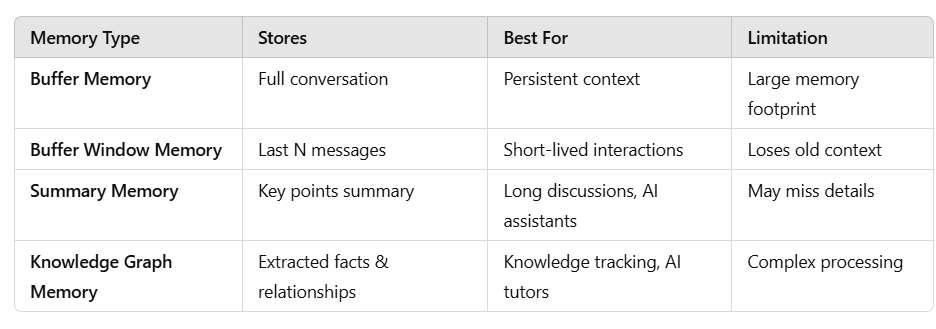

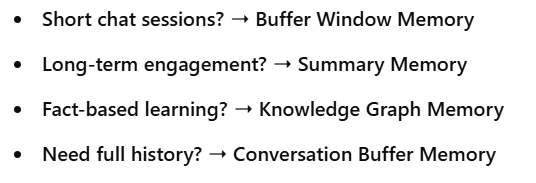